In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Generate 1000 samples from normal distribution

x = np.random.normal(loc=0, scale=1, size=1000)

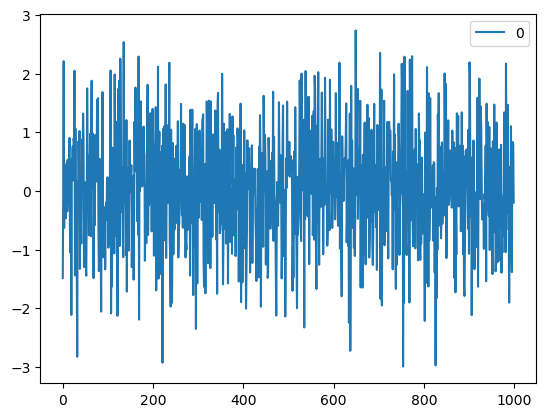

In [3]:
# Plot as time series, i.e. x and y-axis

df = pd.DataFrame(x)

df.plot();

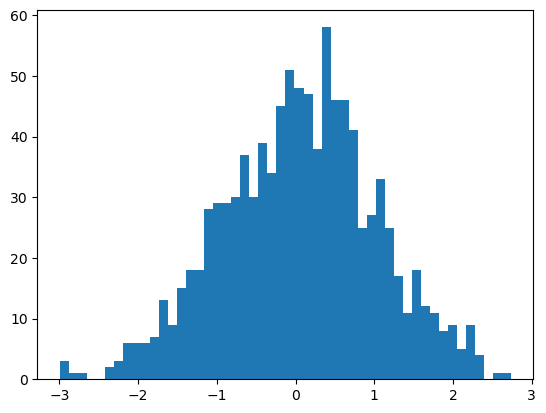

In [4]:
# Plot as histogram distribution

plt.hist(x, bins=50);

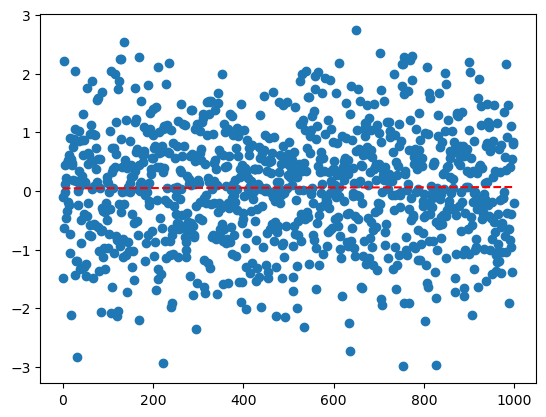

In [5]:
# Plot as trendline in scatterplot

plt.scatter(df.index, df[0])

z = np.polyfit(df.index, df[0], 1)
p = np.poly1d(z)

plt.plot(df.index, p(df.index), "r--");

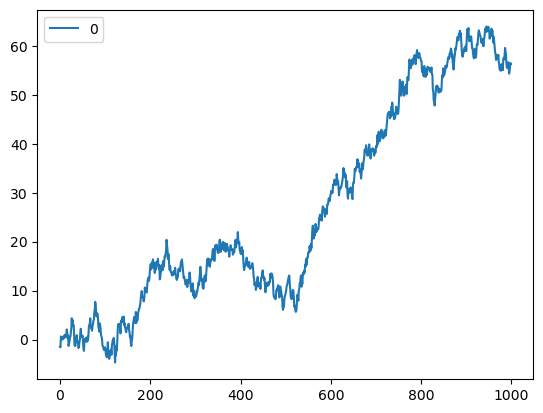

In [6]:
# Plot cumulative sum of values as time series

cumsum_x = np.cumsum(x)

df_cumsum = pd.DataFrame(cumsum_x)

df_cumsum.plot();

In [7]:
# Generate 1000 samples from multi-variate normal distribution, with mean vector 0,0 and covariance

mean, cov = [0, 0], [(1, -0.5), (-0.5, 2)]

sample = np.random.multivariate_normal(mean, cov, 1000)

In [8]:
df_sample = pd.DataFrame(sample, columns=["x", "y"])

df_sample.head()

,x,y
0,2.042673,-1.705888
1,-0.117672,-1.926444
2,0.046307,0.742841
3,-1.910673,-0.289258
4,0.935407,0.350864


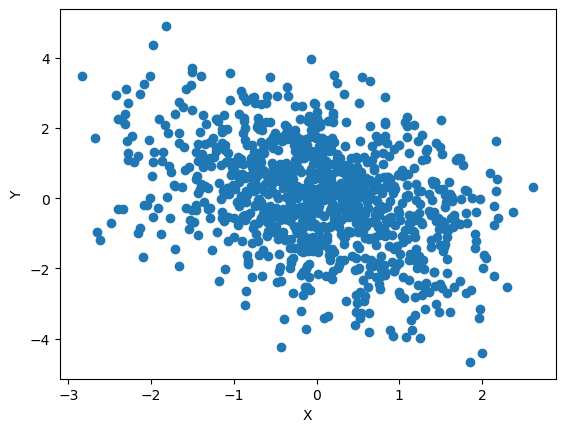

In [10]:
# Plot multi-variate distribution as scatterplot

plt.scatter(df_sample['x'], df_sample['y'])
plt.xlabel('X')
plt.ylabel('Y');

In [11]:
# Calculate sample means manually (i.e. not np.mean)

x_mean = df_sample['x'].sum() / 1000
y_mean = df_sample['y'].sum() / 1000

print('Sample X mean:', x_mean)
print('Sample Y mean', y_mean)

Sample X mean: 0.01286208752570345
Sample Y mean 0.016268436520892614


In [12]:
# Calculate sample covariance

np.cov(df_sample['x'], df_sample['y'])

array([[ 0.94861672, -0.52104687],
       [-0.52104687,  2.20405117]])

**The sample means and covariance should be close to what you expect, i.e. close to mean 0 and covariance (1, -0.5) and (-0.5 and 2).**

**Using a real-world dataset on the number of airline passengers per month, prepare the time series data for modelling.**

In [13]:
airline = pd.read_csv('data/airline_passengers.csv')

airline.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [14]:
# Note that Month column is string object

airline.dtypes

Month         object
Passengers     int64
dtype: object

**You can re-load the data with parsed date column as index:**

In [15]:
airline = pd.read_csv("data/airline_passengers.csv", index_col='Month', parse_dates=True)

In [16]:
airline.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


**Or you can re-format the time data after loading:**

    airline['Month'] = pd.to_datetime(airline.Month, format='%Y-%m-%d')
    airline.set_index('Month', inplace=True).sort_index()

In [18]:
# Filter the dates using loc attribute

airline.loc['1949-01-01' : '1950-01-01']

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [19]:
# Find the earliest and latest dates

airline.index.min()

Timestamp('1949-01-01 00:00:00')

In [20]:
airline.index.max()

Timestamp('1960-12-01 00:00:00')

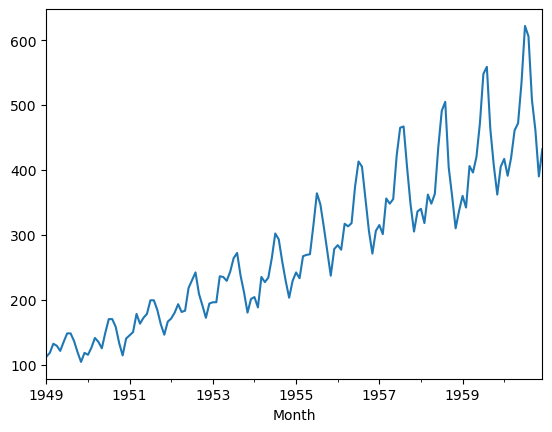

In [21]:
airline['Passengers'].plot();